In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd 
from matplotlib import rc
import os, os.path
mpl.rcParams.update({'font.size': 20})
mpl.rcParams.update({'legend.fontsize': 20})
mpl.rcParams.update({'xtick.labelsize': 20}) 
mpl.rcParams.update({'ytick.labelsize': 20}) 
mpl.rcParams.update({'text.usetex' : False})
#rc('font', weight='bold')
colors = {}
colors['C'] = '#1f77b4'
colors['Fe'] = '#ff7f0e'
colors['Pb']=  '#2ca02c'


plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

<ipython-input-2-b9c70e325ba0>:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, azim=-135, elev=30)


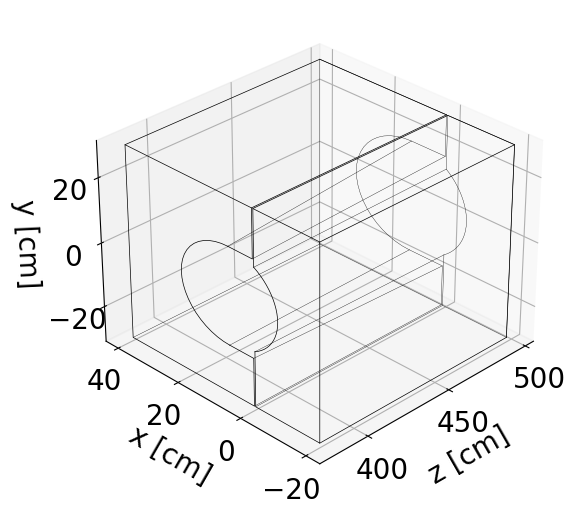

In [2]:

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig, azim=-135, elev=30)

#use different thickness lines for the profiles versus hidden edges
thick=dict(color='k', linewidth=0.5)
thin=dict(color='k', linewidth=0.25)
zmin=380
zmax=380+2.34*50
for holeX, holeR, z,args in (7.7, 15, zmin, thick), (10.55, 17.25, zmax, thin):
    plt.plot([z]*8,[holeX,.2,.2,39.8,39.8, .2, .2, holeX], [-holeR,-holeR,-29.9, -29.9, 29.9, 29.9,holeR, holeR],**args)
    phi = np.linspace(-np.pi/2, np.pi/2, 25)
    plt.plot(0*phi+z,holeX+np.cos(phi)*holeR, holeR*np.sin(phi), **args)
    phi0 = np.arccos((-holeX-.2)/holeR)
    plt.plot([z]*6, [-.2,-.2,-19.8,-19.8, -.2, -.2],  [-holeR*np.sin(phi0),-29.9, -29.9, 29.9, 29.9, holeR*np.sin(phi0)], **args)
    phi = np.linspace(phi0,2*np.pi-phi0, 25)
    plt.plot(0*phi+z, holeX+np.cos(phi)*holeR, holeR*np.sin(phi), **args)
for x in (-19.8, -.2, .2, 39.8):
    for y in (-29.9, 29.9):
        args = thick if y>0 or x<-1 else thin
        plt.plot([zmin, zmax],[x,x], [y,y], **args)

args=thin
plt.plot([zmin, zmax],[.2,.2], [15,17.25], **args)
plt.plot([zmin, zmax],[.2,.2], [-15,-17.25], **args)
plt.plot([zmin, zmax],[7.7,10.55], [15,17.25], **args)
plt.plot([zmin, zmax],[7.7,10.55], [-15,-17.25], **args)
plt.plot([zmin, zmax],[-.2,-.2], [15*np.sin(np.arccos((-7.7-.2)/15)),17.25*np.sin(phi0)], **args)
plt.plot([zmin, zmax],[-.2,-.2], [-15*np.sin(np.arccos((-7.7-.2)/15)),-17.25*np.sin(phi0)], **args)

#outline on the back
plt.plot([zmax, zmax], [39.8,.2], [29.9,29.9], **thick)
plt.plot([zmax, zmax,zmax], [-.2, -19.8, -19.8], [29.9,29.9, -29.9], **thick)
ax.set_xlabel("z [cm]",labelpad=10)
ax.set_ylabel("x [cm]",labelpad=10)
ax.set_zlabel("y [cm]",labelpad=10)

plt.show()

[-15, -15, -12.872839624573903, -12.872839624573903, -12.164077274954032, -11.365451528161916, -10.482862315696986, -9.522829857971105, -8.492446495496162, -7.3993242934743675, -6.251538806867909, -5.05756942138932, -3.826236711149848, -2.5666372757427416, -1.288076538159262, -1.83697019872103e-15, 1.2880765381592585, 2.5666372757427443, 3.8262367111498503, 5.0575694213893225, 6.251538806867912, 7.39932429347437, 8.49244649549616, 9.522829857971104, 10.482862315696988, 11.36545152816192, 12.164077274954034, 12.872839624573903, 12.872839624573903, 15, 15]
[-17.25, -17.25, -13.647710430691296, -13.647710430691296, -12.806590858656957, -11.891418911057482, -10.907486445618185, -9.860482918437546, -8.756462485478563, -7.601808995232649, -6.403199074981098, -5.167563524102929, -3.90204723766704, -2.6139678920449976, -1.310773631439467, -2.1125157285291845e-15, 1.310773631439463, 2.6139678920449936, 3.9020472376670354, 5.167563524102933, 6.4031990749811, 7.601808995232645, 8.756462485478558,

<ipython-input-128-a1aae98c0bbe>:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, azim=azim, elev=elev, proj_type=proj_type, computed_zorder=True)


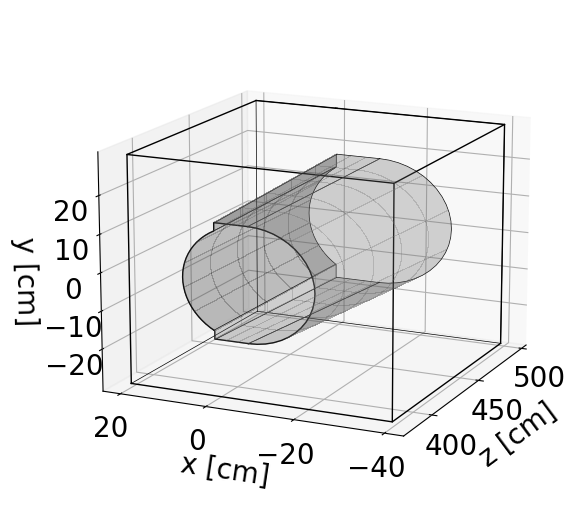

In [128]:
#def wireframe(azim=-135, elev=30):
def wireframe(azim=-155, elev=15, proj_type='persp', translucent_hole=True):
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize=(7,5))
    ax = Axes3D(fig, azim=azim, elev=elev, proj_type=proj_type, computed_zorder=True)

    #use different thickness lines for the profiles versus hidden edges
    thick=dict(color='k', linewidth=1)
    thin=dict(color='k', linewidth=0.5)
    verythin=dict(color='k', linewidth=0.125)
    zmin=380
    zmax=380+2.34*50
    for holeX, holeR, z,args in (-7.7, 15, zmin, thick), (-10.55, 17.25, zmax, thin):
        plt.plot([z]*5,[19.8,-39.8,-39.8, 19.8, 19.8], [-29.9, -29.9, 29.9, 29.9,-29.9],**args)
        #plt.plot([z]*8,[holeX,-.2,-.2,-39.8,-39.8, -.2, -.2, holeX], [-holeR,-holeR,-29.9, -29.9, 29.9, 29.9,holeR, holeR],**args)
        phi = np.linspace(-np.pi/2, np.pi/2, 25)
        plt.plot(0*phi+z,holeX-np.cos(phi)*holeR, holeR*np.sin(phi), **args)
        phi0 = np.arccos(holeX/holeR)
        #plt.plot([z]*6, [.2,.2,19.8,19.8, .2, .2],  [-holeR*np.sin(phi0),-29.9, -29.9, 29.9, 29.9, holeR*np.sin(phi0)], **args)
        phi = np.linspace(phi0,2*np.pi-phi0, 25)
        
        x=holeX-np.cos(phi)*holeR
        y=-holeR*np.sin(phi)
        x = [holeX,0,0] + list(x)+[0,0,holeX]
        y = [-holeR,-holeR,-holeR*np.sin(phi0)]+list(y)+[holeR*np.sin(phi0),holeR, holeR]
        print(y)
        zvals=[z]*len(x)
        plt.plot(zvals, x,y, **args)
    for x in (19.8, -39.8):
        for y in (-29.9, 29.9):
            args = thick if (y>0 and abs(x)>1) or x<-1 else thin
            plt.plot([zmin, zmax],[x,x], [y,y], **args)

    args=thin
    plt.plot([zmin, zmax],[-.2,-.2], [15,17.25], **args)
    plt.plot([zmin, zmax],[-.2,-.2], [-15,-17.25], **args)
    plt.plot([zmin, zmax],[-7.7,-10.55], [15,17.25], **args)
    plt.plot([zmin, zmax],[-7.7,-10.55], [-15,-17.25], **args)
    plt.plot([zmin, zmax],[.2,.2], [15*np.sin(np.arccos((-7.7-.2)/15)),17.25*np.sin(phi0)], **args)
    plt.plot([zmin, zmax],[.2,.2], [-15*np.sin(np.arccos((-7.7-.2)/15)),-17.25*np.sin(phi0)], **args)

    #phi1 = -np.pi*.75
    #phi2 = -np.pi*3/4
    #plt.plot([zmin, zmax],
    #         [-7.7+np.cos(phi1)*15, -10.55+17.25*np.cos(phi2)], 
    #         [np.sin(phi1)*15, 17.25*np.sin(phi2)], **args)
    
    #outline on the back
    plt.plot([zmax, zmax], [19.8,-.2], [29.9,29.9], **thick)
    plt.plot([zmax, zmax,zmax], [.2, -39.8, -39.8], [29.9,29.9, -29.9], **thick)
    ax.set_xlabel("z [cm]",labelpad=10)
    ax.set_ylabel("x [cm]",labelpad=10)
    ax.set_zlabel("y [cm]",labelpad=10)
    
    if translucent_hole:
        alpha=0.3
        phi = np.linspace(np.pi/2, 3*np.pi/2, 100)
        Z = np.arange(zmin, zmax, 4)
        phi, Z = np.meshgrid(phi, Z)
        R=15+(-15+17.25)*(Z-zmin)/(zmax-zmin)
        Xc=-7.7+(-10.55+7.7)*(Z-zmin)/(zmax-zmin)
        X = np.cos(phi)*R+Xc
        Y = np.sin(phi)*R
        surf = ax.plot_surface(Z,X, Y, color='0.5',
                           linewidth=0, antialiased=False, alpha=alpha,ccount=5,  rcount=5)

        a = np.linspace(-1, 1, 30)
        Z = np.arange(zmin, zmax, 4)
        a, Z = np.meshgrid(a, Z)
        R=15+(-15+17.25)*(Z-zmin)/(zmax-zmin)
        Xc=-7.7+(-10.55+7.7)*(Z-zmin)/(zmax-zmin)
        phi0 = np.arccos(-Xc/R)
        phi=a*phi0
        X = np.cos(phi)*R+Xc
        Y = np.sin(phi)*R
        surf = ax.plot_surface(Z,X, Y, color='0.5',
                           linewidth=0, antialiased=False, alpha=alpha, ccount=5, rcount=5)

        for signY in -1,1:
            Z = np.arange(zmin, zmax, 4)
            a = np.linspace(0, 1, 30)
            a, Z = np.meshgrid(a, Z)
            R=15+(-15+17.25)*(Z-zmin)/(zmax-zmin)
            Xc=-7.7+(-10.55+7.7)*(Z-zmin)/(zmax-zmin)

            X = a*Xc
            Y = signY*R
            surf = ax.plot_surface(Z,X, Y, color='0.5',
                           linewidth=0, antialiased=False, alpha=alpha,ccount=3,rcount=5)
            X = 0
            Y = signY*(R*np.sin(phi0)+a*(R-R*np.sin(phi0)))
            surf = ax.plot_surface(Z,X, Y, color='0.5',
                           linewidth=0, antialiased=False, alpha=alpha,ccount=1, rcount=5)
        #surf.set_edgecolor("face")
    ax.set_xticks((400, 450, 500))
    return fig, ax
wireframe()
plt.show()

In [111]:
import uproot as ur
path = '/home/miguel/eic/eic_endcap_insert/'
events = ur.open('/home/ryan/insert_reco_pi-_50GeV_theta_2.83deg.edm4hep.root:events')

arrays = events.arrays()

In [112]:
for field in arrays[0].fields:
    if ".x" in field:
        print(field)

HcalEndcapPHitsReco.position.x
HcalEndcapPHitsReco.dimension.x
HcalEndcapPHitsReco.local.x
HcalEndcapPHitsRecoXY.position.x
HcalEndcapPHitsRecoXY.dimension.x
HcalEndcapPHitsRecoXY.local.x
HcalEndcapPInsertHitsReco.position.x
HcalEndcapPInsertHitsReco.dimension.x
HcalEndcapPInsertHitsReco.local.x
HcalEndcapPInsertHitsRecoXY.position.x
HcalEndcapPInsertHitsRecoXY.dimension.x
HcalEndcapPInsertHitsRecoXY.local.x
InclusiveKinematicsTruth.x
MCParticles.vertex.x
MCParticles.endpoint.x
MCParticles.momentum.x
MCParticles.momentumAtEndpoint.x
MCParticles.spin.x


501.14746
[-15, -15, -12.872839624573903, -12.872839624573903, -12.164077274954032, -11.365451528161916, -10.482862315696986, -9.522829857971105, -8.492446495496162, -7.3993242934743675, -6.251538806867909, -5.05756942138932, -3.826236711149848, -2.5666372757427416, -1.288076538159262, -1.83697019872103e-15, 1.2880765381592585, 2.5666372757427443, 3.8262367111498503, 5.0575694213893225, 6.251538806867912, 7.39932429347437, 8.49244649549616, 9.522829857971104, 10.482862315696988, 11.36545152816192, 12.164077274954034, 12.872839624573903, 12.872839624573903, 15, 15]
[-17.25, -17.25, -13.647710430691296, -13.647710430691296, -12.806590858656957, -11.891418911057482, -10.907486445618185, -9.860482918437546, -8.756462485478563, -7.601808995232649, -6.403199074981098, -5.167563524102929, -3.90204723766704, -2.6139678920449976, -1.310773631439467, -2.1125157285291845e-15, 1.310773631439463, 2.6139678920449936, 3.9020472376670354, 5.167563524102933, 6.4031990749811, 7.601808995232645, 8.756462

<ipython-input-128-a1aae98c0bbe>:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, azim=azim, elev=elev, proj_type=proj_type, computed_zorder=True)
<ipython-input-133-f4b5c37fc898>:30: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',
<ipython-input-133-f4b5c37fc898>:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


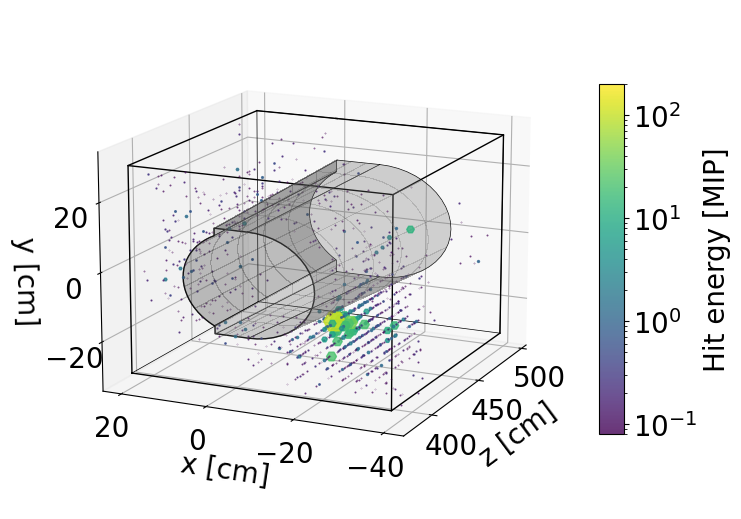

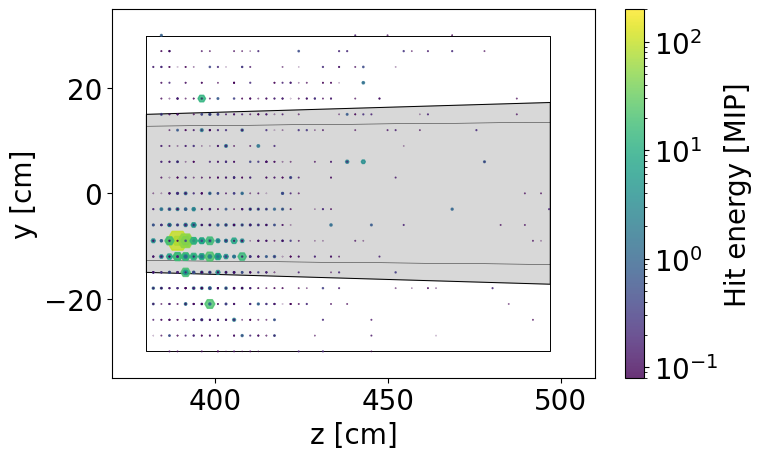

590.00854
[-15, -15, -12.872839624573903, -12.872839624573903, -12.164077274954032, -11.365451528161916, -10.482862315696986, -9.522829857971105, -8.492446495496162, -7.3993242934743675, -6.251538806867909, -5.05756942138932, -3.826236711149848, -2.5666372757427416, -1.288076538159262, -1.83697019872103e-15, 1.2880765381592585, 2.5666372757427443, 3.8262367111498503, 5.0575694213893225, 6.251538806867912, 7.39932429347437, 8.49244649549616, 9.522829857971104, 10.482862315696988, 11.36545152816192, 12.164077274954034, 12.872839624573903, 12.872839624573903, 15, 15]
[-17.25, -17.25, -13.647710430691296, -13.647710430691296, -12.806590858656957, -11.891418911057482, -10.907486445618185, -9.860482918437546, -8.756462485478563, -7.601808995232649, -6.403199074981098, -5.167563524102929, -3.90204723766704, -2.6139678920449976, -1.310773631439467, -2.1125157285291845e-15, 1.310773631439463, 2.6139678920449936, 3.9020472376670354, 5.167563524102933, 6.4031990749811, 7.601808995232645, 8.756462

<ipython-input-128-a1aae98c0bbe>:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, azim=azim, elev=elev, proj_type=proj_type, computed_zorder=True)
<ipython-input-133-f4b5c37fc898>:30: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',
<ipython-input-133-f4b5c37fc898>:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


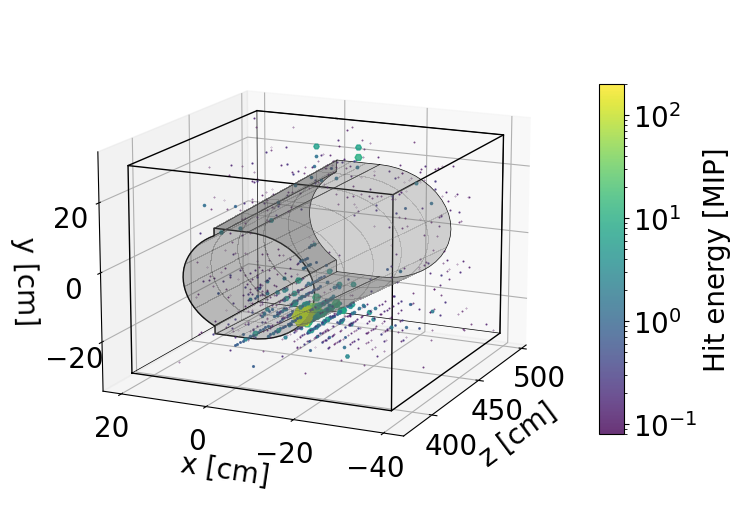

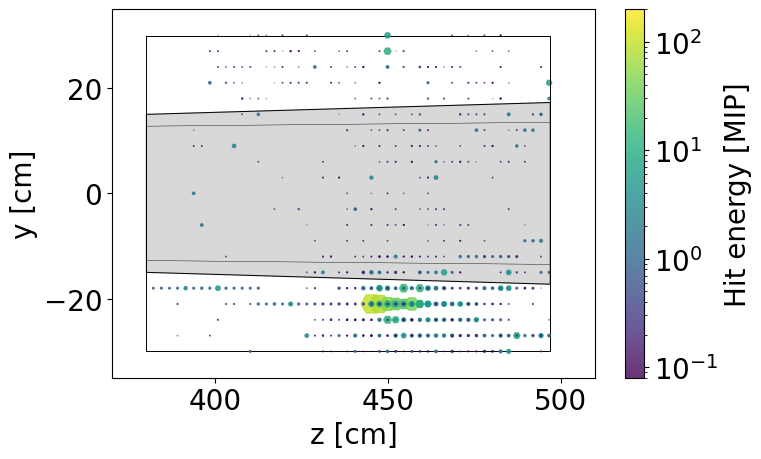

554.0161
[-15, -15, -12.872839624573903, -12.872839624573903, -12.164077274954032, -11.365451528161916, -10.482862315696986, -9.522829857971105, -8.492446495496162, -7.3993242934743675, -6.251538806867909, -5.05756942138932, -3.826236711149848, -2.5666372757427416, -1.288076538159262, -1.83697019872103e-15, 1.2880765381592585, 2.5666372757427443, 3.8262367111498503, 5.0575694213893225, 6.251538806867912, 7.39932429347437, 8.49244649549616, 9.522829857971104, 10.482862315696988, 11.36545152816192, 12.164077274954034, 12.872839624573903, 12.872839624573903, 15, 15]
[-17.25, -17.25, -13.647710430691296, -13.647710430691296, -12.806590858656957, -11.891418911057482, -10.907486445618185, -9.860482918437546, -8.756462485478563, -7.601808995232649, -6.403199074981098, -5.167563524102929, -3.90204723766704, -2.6139678920449976, -1.310773631439467, -2.1125157285291845e-15, 1.310773631439463, 2.6139678920449936, 3.9020472376670354, 5.167563524102933, 6.4031990749811, 7.601808995232645, 8.7564624

<ipython-input-128-a1aae98c0bbe>:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, azim=azim, elev=elev, proj_type=proj_type, computed_zorder=True)
<ipython-input-133-f4b5c37fc898>:30: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',
<ipython-input-133-f4b5c37fc898>:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


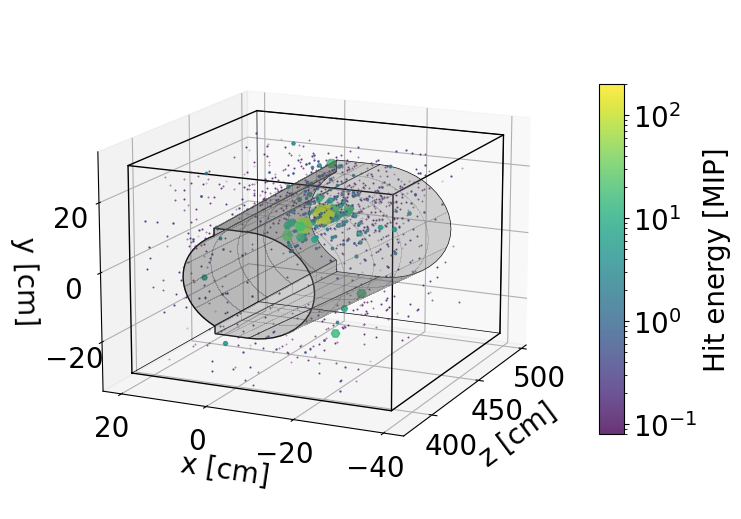

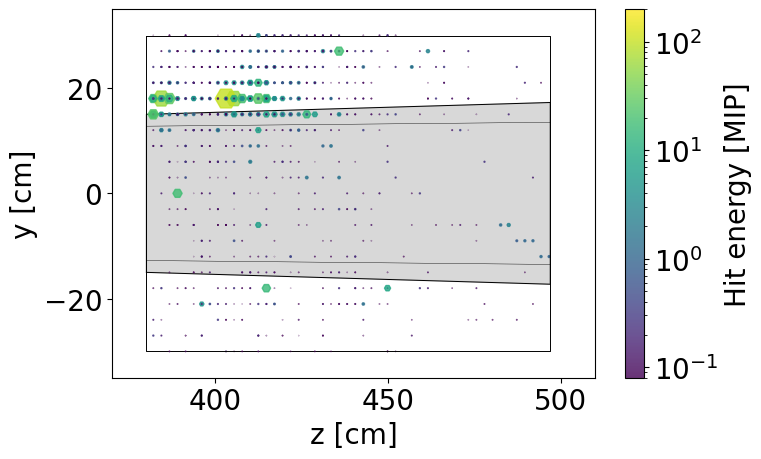

In [133]:
import matplotlib as matplotlib
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D 
# Creating figure

MIP=.60

for event in range(1,4):
    
    x = arrays['HcalEndcapPInsertHitsReco.position.x'][event,:]/10.0
    y = arrays['HcalEndcapPInsertHitsReco.position.y'][event,:]/10.0
    z = arrays['HcalEndcapPInsertHitsReco.position.z'][event,:]/10.0
    e = 1000.0*arrays['HcalEndcapPInsertHitsReco.energy'][event,:]
    
    t =arrays['HcalEndcapPInsertHitsReco.time'][event,:]
    condition = t<200*min(t)
    x = x[condition]
    y = y[condition]
    z = z[condition]
    e = e[condition]
    #leaked_x = arrays['LeakedHits.position.x'][event,:]/10.0
    #leaked_y = arrays['LeakedHits.position.y'][event,:]/10.0
    #leaked_z = arrays['LeakedHits.position.z'][event,:]/10.0
    #leaked_e = 1000.0*arrays['LeakedHits.energy'][event,:]

    print(np.sum(e))
    #fig = plt.figure(figsize = (9, 6))
    #ax = plt.axes(projection ="3d")
    fig, ax = wireframe(azim=-155, elev=15, proj_type='persp')
    ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)


    my_cmap = plt.get_cmap('viridis')
    inferno =  plt.get_cmap('inferno')
    # Creating plot
    for xi, yi, zi, ei in zip(x,y,z,e):
        #sctt = ax.scatter3D(z, x, y,
        sctt = ax.scatter3D(zi, xi, yi,
                    alpha = 0.8,
                    c = ei/MIP,
                    s=4*ei,
                    cmap = my_cmap,
                    norm=matplotlib.colors.LogNorm(vmin=0.08, vmax=200),
                    marker ='H')

    cb = fig.colorbar(sctt, ax = ax, shrink = .7, aspect = 14)
    cb.set_label("Hit energy [MIP]")
    plt.tight_layout()
    fig.savefig('plots/shower_3d_view%i.pdf'%(event))
    plt.show()
    
    #2d plot
    fig, ax = plt.subplots(1,1, figsize=(8,5))
    plt.ylim(-35,35)
    plt.xlim(370,510)
    #ax.grid(b = True, color ='grey',
    #    linestyle ='-.', linewidth = 0.3,
    #    alpha = 0.2)

    my_cmap = plt.get_cmap('viridis')
    inferno =  plt.get_cmap('inferno')
    # Creating plot
    sctt = ax.scatter(z[x<0], y[x<0],
                    alpha = 0.8,
                    c = e[x<0]/MIP,
                    s=4*e[x<0],
                    cmap = my_cmap,
                    norm=matplotlib.colors.LogNorm(vmin=0.08, vmax=200),
                    marker ='H',zorder=3)
    plt.fill([zmin, zmax, zmax, zmin, zmin], [-15,-17.25, 17.25, 15, -15],color='0.5', alpha=.3)
    sctt = ax.scatter(z[x>=0], y[x>=0],
                    alpha = 0.8,
                    c = e[x>=0]/MIP,
                    s=4*e[x>=0],
                    cmap = my_cmap,
                    norm=matplotlib.colors.LogNorm(vmin=0.08, vmax=200),
                    marker ='H',zorder=1)
    
    plt.xlabel("z [cm]")
    plt.ylabel("y [cm]")
    zmin=380
    zmax=380+2.34*50
    
    plt.plot([zmin, zmax, zmax, zmin, zmin], [29.9, 29.9, -29.9, -29.9, 29.9], color='k', linewidth=0.7)
    plt.plot([zmin, zmax, zmax, zmin, zmin], [-15,-17.25, 17.25, 15, -15], color='k', linewidth=0.7)
    
    plt.plot([zmin, zmax], [15*np.sin(np.arccos((-7.7-.2)/15)),17.25*np.sin(phi0)], color='k', linewidth=0.3)
    plt.plot([zmin, zmax], [-15*np.sin(np.arccos((-7.7-.2)/15)),-17.25*np.sin(phi0)], color='k', linewidth=0.3)
    
    cb = fig.colorbar(sctt, ax = ax, shrink = 1, aspect = 20)
    cb.set_label("Hit energy [MIP]")
    plt.tight_layout()
    fig.savefig('plots/shower_2d_view%i.pdf'%(event))
    plt.show()

In [121]:
help(ax.scatter)

Help on method scatter in module matplotlib.axes._axes:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs) method of matplotlib.axes._subplots.AxesSubplot instance
    A scatter plot of *y* vs. *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : float or array-like, shape (n, )
        The data positions.
    
    s : float or array-like, shape (n, ), optional
        The marker size in points**2.
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : array-like or list of colors or color, optional
        The marker colors. Possible values:
    
        - A scalar or sequence of n numbers to be mapped to colors using
          *cmap* and *norm*.
        - A 2D array in which the rows are RGB or RGBA.
        - A sequence of colors of length n.
        - A single color format string.
    
        Note that *

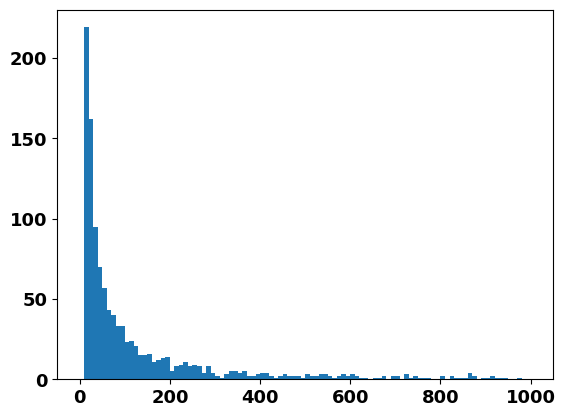

In [148]:
plt.hist(t, bins=100, range=(0, 1000))
plt.show()

In [98]:
fig, ax = plt.subplots(1,1)
help(ax.scatter)

Help on method scatter in module matplotlib.axes._axes:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs) method of matplotlib.axes._subplots.AxesSubplot instance
    A scatter plot of *y* vs. *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : float or array-like, shape (n, )
        The data positions.
    
    s : float or array-like, shape (n, ), optional
        The marker size in points**2.
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : array-like or list of colors or color, optional
        The marker colors. Possible values:
    
        - A scalar or sequence of n numbers to be mapped to colors using
          *cmap* and *norm*.
        - A 2D array in which the rows are RGB or RGBA.
        - A sequence of colors of length n.
        - A single color format string.
    
        Note that *

In [50]:
help(Axes3D.plot_surface)

Help on function plot_surface in module mpl_toolkits.mplot3d.axes3d:

plot_surface(self, X, Y, Z, *args, norm=None, vmin=None, vmax=None, lightsource=None, **kwargs)
    Create a surface plot.
    
    By default it will be colored in shades of a solid color, but it also
    supports colormapping by supplying the *cmap* argument.
    
    .. note::
    
       The *rcount* and *ccount* kwargs, which both default to 50,
       determine the maximum number of samples used in each direction.  If
       the input data is larger, it will be downsampled (by slicing) to
       these numbers of points.
    
    .. note::
    
       To maximize rendering speed consider setting *rstride* and *cstride*
       to divisors of the number of rows minus 1 and columns minus 1
       respectively. For example, given 51 rows rstride can be any of the
       divisors of 50.
    
       Similarly, a setting of *rstride* and *cstride* equal to 1 (or
       *rcount* and *ccount* equal the number of rows and